### Classification:

In this Lab, you will perform a classification task on a WiFi dataset, and also explore the question, "Is more data useful for a classification task?"

* The dataset you will use can be found on:
https://archive.ics.uci.edu/ml/datasets/ujiindoorloc .
* You can also find it under the datset section on the Canvas(trainingData.csv and validationData.csv)

* Once you examine the data sets, you will find that there is a training set and a validation set. You can use them to build your classification model.
    - We will use a training set for training
    - We will use a validation set for testing
    
* We will use Logistic Regression, KNN classifier, and SVM, to build a baseline models for each algorithm.
* We will write a python function for modeling and calculate the accuracy and F1-score for all models one time by calling modeling function.

### Classification:

In this Lab, you will perform a classification task on a WiFi dataset, and also explore the question, "Is more data useful for a classification task?"

* The dataset you will use can be found on:
https://archive.ics.uci.edu/ml/datasets/ujiindoorloc .
* You can also find it under the datset section on the Canvas

* Once you examine the data sets, you will find that there is a training set and a validation set. You can use them to build your classification model.
    - We will use a training set for training
    - We will use a validation set for testing
    
* We will use Logistic Regression, KNN classifier, and SVM, to build a baseline models for each algorithm.
* We will write a python function for modeling and calculate the accuracy and F1-score for all models one time by calling modeling function.

## -------------------------------------------------------------

## Importing packages, libraries, define and functions:
In folowing cell is used to import:
* The standard data science and machine learning libraries: numpy, pandas, and scikit-learn.
* matplotlib and seaborn for visualization.

Define the functions:
* Reverse_representation -> function to reverse the representation of the data
* modeling --> function to be used to build multiple models at the same time.

In [ ]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC


from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
import collections




def Reverse_representation(data):
    data.iloc[:, 0:520] = np.where(data.iloc[:, 0:520] <= 0, data.iloc[:, 0:520] + 105, data.iloc[:, 0:520] - 100)
    # Return the cleaned dataframe.
    return data

"""
Build classification model:
input: data (raw or normalized data)
output: data frame has the evaluated score (%)
"""
def modling(X_train, X_test, y_train, y_test):
    test_metrics = collections.defaultdict(list) # to keep the evaluted value of each experiment for each ML algorithms.
    modelName = []

    for  model, name in (
        (LogisticRegression(solver='liblinear', penalty='l1'), 'LR'),
        (KNeighborsClassifier(), 'KNN'),
        (SVC(), 'SVM')):

        modelName.append(name)

        # do one expermint for each model
        # fit model on training dataset
        model_fit = model.fit(X_train, y_train)

        # evaluate on the test dataset
        test_yhat = model.predict(X_test)
        test_acc = metrics.accuracy_score(y_test, test_yhat)
        test_f1 = metrics.f1_score(y_test, test_yhat, average='weighted')

        test_metrics['accuracy'].append(round(test_acc*100,2))
        test_metrics['f1_score'].append(round(test_f1 *100,2))

    # convert the metrics list into dataframe for simplisity
    model_metrics_df = pd.DataFrame(data=test_metrics, index=modelName)
    return model_metrics_df

"""
Plot the results obtained from three algorithms
return best scores of the best model
"""
def plot_model_result(metrics_df, feature_type):
    # Set styles
    plet = "RdBu"
    plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
    plt.style.use(['seaborn'])
    sns.set_palette(plet, 8)
    matplotlib.rc("font", family="Times New Roman", size=12)

    labels = ['LR', 'KNN', 'SVM']
    accuracy = metrics_df.accuracy
    f1_score = metrics_df.f1_score
    bar_width = 0.30
    data = [accuracy, f1_score ]

    colors = sns.color_palette(plet, 8)


    index = np.arange(len(labels))
    #fig = plt.figure(figsize=(12,9))
    plt.bar(index, accuracy, bar_width)
    plt.bar(index+bar_width+.02, f1_score, bar_width)


    the_table = plt.table(cellText=data, fontsize=18,
              rowLabels=[' Accuracy ', 'F1_score'],
              rowColours=colors,
              colLabels=labels,
              cellLoc='center',
              loc='bottom',
              bbox=[0, -0.204 , 1, 0.2])

    the_table.auto_set_font_size(False)
    the_table.set_fontsize(12)


    # Adjust layout to make room for the table:
    plt.subplots_adjust(left=0.2, bottom=0.2)

    plt.ylabel('Score (%)',  fontsize=18 )
    plt.xticks([])
    plt.yticks(fontsize=15)
    plt.title('Comparison of model performance of  classifiers using %s'%feature_type,  fontsize=18)
    plt.show()

    best_accuracy = metrics_df['accuracy'].max()
    print(" Best score (%):-")
    print(best_accuracy)
    best_f1_score = metrics_df['f1_score'].max()
    print(best_f1_score)
    return best_accuracy, best_f1_score

In [ ]:
# Load the dataset
# store the Dataset in a Pandas Dataframe
trainingData = pd.read_csv('trainingData.csv')
validationData = pd.read_csv('validationData.csv')
# check the head of the data frame for train and validate data:
print('----------------------trainingData-------------------------')
print(trainingData.head(4))
print('----------------------validationData-------------------------')
print(validationData.head(4))

----------------------trainingData-------------------------
   WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     100     100     100     100     100     100     -97     100   
3     100     100     100     100     100     100     100     100     100   

   WAP010  ...  WAP520  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0     100  ...     100 -7541.2643  4.864921e+06      2           1      106   
1     100  ...     100 -7536.6212  4.864934e+06      2           1      106   
2     100  ...     100 -7519.1524  4.864950e+06      2           1      103   
3     100  ...     100 -7524.5704  4.864934e+06      2           1      102   

   RELATIVEPOSITION  USERID  PHONEID   TIMESTAMP  
0                 2       2       23  1371713733  
1                 2       2       23  1371713691  
2    

In [ ]:
# How many attributes and samples in the data.
num_rows_t, num_cols_t  = trainingData.shape
print('----------------------trainingData-------------------------')
print('Number of attributes: %d'%num_cols_t)
print('Number of samples: %d'%num_rows_t)
print('----------------------validationData-------------------------')
num_rows_v, num_cols_v  = validationData.shape
print('Number of attributes: %d'%num_cols_v)
print('Number of samples: %d'%num_rows_v)

----------------------trainingData-------------------------
Number of attributes: 529
Number of samples: 19937
----------------------validationData-------------------------
Number of attributes: 529
Number of samples: 1111


In [ ]:
# check for difference in columns in train and validate dataset:
diff1 = set(trainingData.columns) - set(validationData.columns)
diff2 = set(validationData.columns) - set(trainingData.columns)
print(diff1, diff2)

set() set()


From the result above we have empty sets meaning the train and validate dataset have same features.

In [ ]:
# What are the columns names
col_names = trainingData.columns.values
col_names

array(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006',
       'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012',
       'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018',
       'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024',
       'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030',
       'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036',
       'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042',
       'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048',
       'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054',
       'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060',
       'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066',
       'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072',
       'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078',
       'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084',
       'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP0

## Visualize the data

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

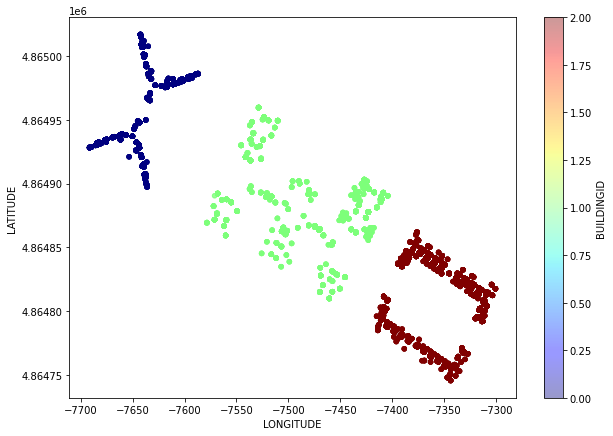

In [ ]:
# Let’s create a scatter plot with latitude and longitude to visualize the data:
trainingData.plot(kind="scatter", x='LONGITUDE', y='LATITUDE', alpha=0.4, figsize=(10,7),
    c="BUILDINGID", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)


<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

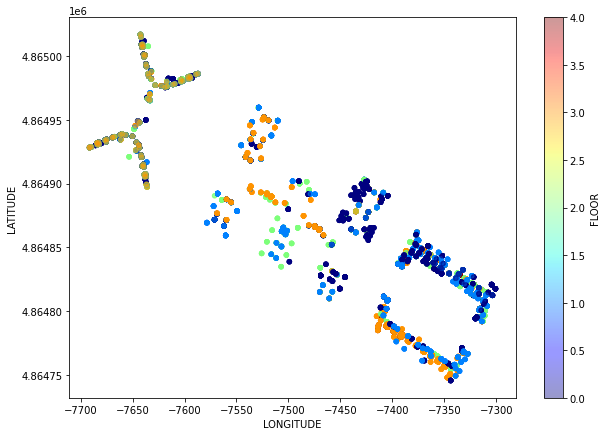

In [ ]:
trainingData.plot(kind="scatter", x='LONGITUDE', y='LATITUDE', alpha=0.4, figsize=(10,7),
    c="FLOOR", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)


## Determine the Target variable/variables
To decide what is the Target, the best practice is to explore the data set and understand why this dataset has been collected. As wall, answer the business question.
The description of the dataset points that the dataset is indoor localization database to test Indoor Positioning.
By analyzing this statement, position mean location. So, to identify any location, we are interested in answering  ‘where’ question. Then, see if our dataset has any attribute related to location?
Thus, our potential target are  coordinates (latitude, longitude), building iD and  floor number.
Now to determine our inputs, we look at the objective of this study. We want to  predict  the indoor localization based on Wifi fingerprints. So, in this dataset we have 529 attributes contain the WiFi fingerprint.

Thus, we drop the SPACEID', 'RELATIVEPOSITION', 'USERID','PHONEID', 'TIMESTAMP since they have of no importance to our prediction.

Also, since we want to solve a calssification problem and we have FLOOR and BUILDINGID, so we can use them to define a precise location.
The longitude and latitude are not used in this work because we need to use a regression predictions to pair them, which is out of the scope of this work since using regression to predicting the longitude alone and latitude alone does not make sense in terms of location. So we decide not to use them as a target to solve this problem.

Now, if we chose the FLOOR and BUILDINGID to be our targtes, we will face the Multi-label classification problem, which is the out of the scope of this lab. So we will drop the FLOOR and make the BUILDINGID our target.

In [ ]:
# drop 'LONGITUDE', 'LATITUDE', 'FLOOR', SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP from both trainingData and validationData:
dropped_col = [ 'LONGITUDE', 'LATITUDE', 'FLOOR', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP']

# check if the coulmen has not dropped yet:
if set(dropped_col).issubset(trainingData.columns):
  trainingData = trainingData.drop(dropped_col, axis=1)
  print(" The %s have been dropped from training data " % dropped_col)


if set(dropped_col).issubset(validationData.columns):
  validationData = validationData.drop(dropped_col, axis=1)
  print(" The %s have been dropped from validation data " % dropped_col)

print('Number of attributes in training data = %d'%trainingData.shape[1])
print('Number of attributes in validation data = %d'%validationData.shape[1])

Number of attributes in training data = 521
Number of attributes in validation data = 521


In [ ]:
# Let's check the unique values for BULDINGID.
print("Unique Values from BUILDINGID %s "%np.sort(trainingData["BUILDINGID"].unique()))
# --> we  have 3 buldings

Unique Values from BUILDINGID [0 1 2] 


# Data set preparation:
## Preprocessing and Feature Engineering:

determine what are your features and targets

**\[1\]** Categorical Encoding

**\[2\]** Imputation

**\[3\]** Scalling Normalization

**\[1\]** Categorical Encoding:

To improve the predictions is by applying clever ways when working with categorical variables. These variables have discrete values and represent some sort of category or class.
Since some machine learning algorithms do not support categorical variables without further manipulation, we need to do Categorical Encoding
So, let check if our dataset has categorical variables

* The dataframe.info method is a quick way to assess the data by displaying the data types of each column

* -> from the results below, we can see that ther are no categorical variables in our dataset. Thus, no need to apply any type of categorical encoding,

In [ ]:
# See the column data types and non-missing values
trainingData.info()
trainingData.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 521 entries, WAP001 to BUILDINGID
dtypes: int64(521)
memory usage: 79.2 MB


WAP001        int64
WAP002        int64
WAP003        int64
WAP004        int64
WAP005        int64
              ...  
WAP517        int64
WAP518        int64
WAP519        int64
WAP520        int64
BUILDINGID    int64
Length: 521, dtype: object

**\[2\]** Imputation
Since we have the correct column datatypes, we can start analysis by looking at the percentage of missing values in each column.
Missing values have to be filled in for machine learning methods.

In [ ]:
# Missing Values
# If there are missing values in the Dataset before doing any farther steps, we need to handle those missing values.
# Checking the missing values
training_data_missing_values = trainingData.isnull().sum()
total_training_data_missing_values = training_data_missing_values.sum()
print(" Total training data missing values = %d"%total_training_data_missing_values)

validation_data_missing_values = validationData.isnull().sum()
total_validation_data_missing_values = validation_data_missing_values.sum()
print(" Total validation Data missing values = %d"%total_validation_data_missing_values )

 Total training data missing values = 0
 Total validation Data missing values = 0


## Preprocessing:
Before strting modling, we need to do some preprocessing in datasets.
The objective of this case-study is using Wi-Fi fingerprints as the features to predict user indoorlocation ( buldingId-foolr).
* Reverse the representation of the signals to have positive values:
1) +100 -> 0  (no signal 'no detectable signal' )
2) -104 to 0 -> 1 to 105 (weak to strong) where 1 a very poor signal and 105 represent stronger signals

The resones why we convert the "not detecable = 100" to be 0 because from the dataset we can see thet a few WAPs were detected. So, in this regrad using a sparse matrix would more likely repersent the data better.

In [ ]:
# To avoid data corrupted, the reverse representation should be run only one time, otherwise, the data will destroy
# Thus, we need to check if the reverse representation has been done or not by testing if we have a negtive values in the dataset or no
if (trainingData< 0).any().any():
    print('The Reverse_representation processed on the Training data')
    Reverse_representation(trainingData)

if (validationData< 0).any().any():
    print('The Reverse_representation processed on the Validation data')
    Reverse_representation(validationData)

The Reverse_representation processed on the Training data
The Reverse_representation processed on the Validation data


In [ ]:
# split the data to train and test using 100% of the trainingDataset as training data & using validationData as testing data:

train_X = trainingData.loc[:, trainingData.columns != 'BUILDINGID']
train_y = trainingData['BUILDINGID']
test_X = validationData.loc[:, validationData.columns != 'BUILDINGID']
test_y = validationData['BUILDINGID']

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(19937, 520)
(1111, 520)
(19937,)
(1111,)


### One experiments using 3 algorithms:
* LR (Logistic Regression)
* KNN ( K-Nearest Neighbours )
* SVM (Support Vector Machine)

### compare the results of 3 ML algorithms:
visualize the result and pick the best model

In [ ]:
#build classification model using original data:
original_data_score_df = modling(train_X, test_X, train_y, test_y)

In [ ]:
# Normalization:
scaler = MinMaxScaler()
X_train_normed = scaler.fit_transform(train_X)
X_test_normed = scaler.transform(test_X)

normalized_data_score_df = modling(X_train_normed, X_test_normed, train_y, test_y)

## Plot the results of the models

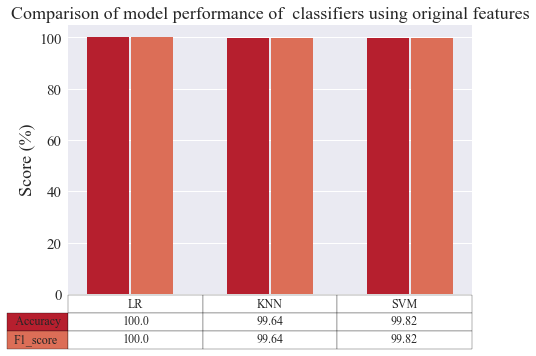

 Best score (%):-
100.0
100.0


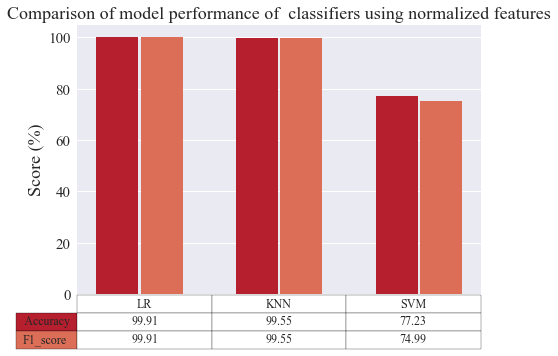

 Best score (%):-
99.91
99.91


In [ ]:
best_accurcy_or_ft, best_f1_score_or_ft = plot_model_result(original_data_score_df, "original features")
best_accurcy_norm_ft, best_f1_score_norm_ft = plot_model_result(normalized_data_score_df, "normalized features")

* Note :
 - The best performing model using original features is LR
 - The best performing model using normalized features is LR